## Q1 K-Means

Implement K-Means Clustering on the dataset at the following location :  https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

You are expected to do all necessary EDA, feature scaling and transforms.

First, arbitarily choose cluster value as 2. Then use the elbow method which was discussed in class to identify the best number of cluster. While exploring this, if you observe the need to consider inertia as a factor, do so with proper rationale.

Write a bried explanation as to how PCA can help with clustering in this example.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [108]:
df = pd.read_csv("Live_20210128.csv")

In [109]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [110]:
#Dropping the unnecessary columns 
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [111]:
print("status_id:",len(df['status_id'].unique()))
print("status_type:",len(df['status_type'].unique()))
print("status_published:",len(df['status_published'].unique()))

status_id: 7050
status_type: 4
status_published: 6913


Before coming up with this approach of dropping the status_published column. I tried fetching info like month, year, day and hour from the status_published column with the preassumption that these parameters could be influential in analysing a social media dataset but unfortunately it did not work properly as I was getting a very ambigious inertia vs K graph. It was not possible to determine the optimum value of K from it and thus continued with the below approach.

In [112]:
#Dropping the status id
df.drop(['status_id'], axis=1, inplace=True)
df.drop(['status_published'], axis=1, inplace=True)
df.drop(['status_type'], axis=1, inplace=True)

In [113]:
#Looking for highly correlated columns 
df.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000


We can drop either num_reactions or num_likes as they are highly correlated. In our case we are dropping the num reactions columns.

In [114]:
df.drop(['num_reactions'], axis=1, inplace=True)

In [115]:
df.head(5)

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,512,262,432,92,3,1,1,0
1,0,0,150,0,0,0,0,0
2,236,57,204,21,1,1,0,0
3,0,0,111,0,0,0,0,0
4,0,0,204,9,0,0,0,0


In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(df)

In [117]:
scaled_data = pd.DataFrame(scaled_X, columns=[df.columns])
scaled_data.head(5)

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [118]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0) 
model.fit(scaled_data)
model.inertia_


83.3437081056008

In [119]:
inertia = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertia.append(model.inertia_)



In [120]:
inertia

[83.34378056229819,
 59.20414385826563,
 48.378273471169074,
 42.146948487215646,
 37.44731923875682,
 33.94909602923243,
 30.60060487382699,
 28.94882870813795]

Text(0, 0.5, 'Sum of Squared Distances')

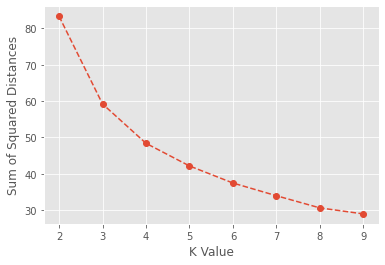

In [121]:
plt.plot(range(2,10),inertia,'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")

From the above graph we can infer that the optimum value of K = 4.

In addition to that, PCA is a technique used to reduce the dimensionality of a dataset by projecting the data onto a lower-dimensional subspace. This can be useful when working with k-means clustering, as the technique is sensitive to the scale of the data and can be computationally intensive when working with high-dimensional data. By using PCA to reduce the dimensionality of the data, the k-means algorithm can run more efficiently and may produce more meaningful clusters. Additionally, PCA can help to identify patterns in the data and highlight the most important features, which can be helpful in interpreting the resulting clusters.

## Q2 Loss Functions

In [122]:
actual=[0,1,0,0,1,0,0,1,1,1]
predicted=[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
actual2 = [-1,1,-1,-1,1,-1,-1,1,1,1] 

Let the desired output to 10 inputs be,

> [0,1,0,0,1,0,0,1,1,1]


and let the corresponding actual output obtained from a machine be 


> [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


Find programmatically or by hand the loss obtained from using:

1.   a symmetric 0 − 1 loss function,

2.   the cross-entropy loss function and

3.   the hinge loss function.

If required assume a threshold of 0.5 to obtain a class from the machine output.  (sklearn by default uses 0.5 as threshold for binary classification) 

In [123]:
#a symmetric 0 − 1 loss function

loss=[]
count=0
for i in range(len(actual)):
  if predicted[i]>0.5:
    loss.append(1)
  else:
    loss.append(0)
  if loss[i]==actual[i]:
    count+=0
  else:
    count+=1
print("At a threshold of 0.5 the symmetric 0-1 loss is {:.2f}".format(count/len(actual)))

At a threshold of 0.5 the symmetric 0-1 loss is 0.50


In [124]:
#cross-entropy loss function

from sklearn.metrics import log_loss
print("At a threshold of 0.5 the Cross-entropy loss is {:.2f}".format(log_loss(actual,predicted)))

At a threshold of 0.5 the Cross-entropy loss is 0.92


In [125]:
#Hinge loss
loss=0
for i in range(len(predicted)):
    loss+=max(0,1-actual2[i]*predicted[i])

print("At a threshold of 0.5 the hinge loss is {:.2f}".format(loss/len(actual2)))

At a threshold of 0.5 the hinge loss is 1.00
